In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import shap
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
from copy import deepcopy
import joblib 
import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wild-blueberry-yield-prediction/Data in Brief/Data in Brief/Data in brief_WildBlueberryPollinationSimulation.docx
/kaggle/input/wild-blueberry-yield-prediction/Data in Brief/Data in Brief/WildBlueberryPollinationSimulationData.csv


## **🍇 Project 3: Wild Blueberry Yield Prediction**

🧾**Description:** The dataset used for predictive modelling was generated by the Wild Blueberry Pollination Simulation Model, which is an open-source, spatially-explicit computer simulation program, that enables exploration of how various factors, including plant spatial arrangement, outcrossing and self-pollination, bee species compositions and weather conditions, in isolation and combination, affect pollination efficiency and yield of the wild blueberry agro-ecosystem. The simulation model has been validated by the field observation and experimental data collected in Maine USA and Canadian Maritimes during the last 30 years and now is a useful tool for hypothesis testing and theory development for wild blueberry pollination researches. This simulated data provides researchers who have actual data collected from field observation and those who wants to experiment the potential of machine learning algorithms response to real data and computer simulation modelling generated data as input for crop yield prediction models.

🧭 **Problem Statement:** The target feature is **yield** which is a continuous variable. The task is to classify this variable based on the other 17 features step-by-step by going through each day's task. The evaluation metrics will be RMSE score



As it have continuous variable to get predicted, we can follow regression tasks.

1. Reading Dataset
2. EDA : 
    Getting insights and visualizations.
3. Preprocessing : 
    cleaning and making data ready for training.
4. Encoding: 
    If categorical values are present.
  * Normalization/standardization : 
    Only for numerical columnsIf column values are highly varied.
    
5. Data Imbalance : 
    If needed
6. Baseline Modelling.
7. Hyperparameter tuning. 
8. Model upgradtions.
9. Explainable AI.

***1. Reading Dataset***

In [2]:
# Reading using pandas
pollination = pd.read_csv("/kaggle/input/wild-blueberry-yield-prediction/Data in Brief/Data in Brief/WildBlueberryPollinationSimulationData.csv")
pollination1 = deepcopy(pollination)
pollination2 = deepcopy(pollination)
pollination3 = deepcopy(pollination)

In [3]:
# Getting Shape 
pollination.shape

(777, 18)

***2. EDA***

In [4]:
# Getting information abt each column of dataset
pollination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

##### observations:
* Totally we have 17 columns in dataset and 16 columns are independent variables and 1("yield") is a target varible(dependent)
* Each column has 777 rows (instances).
* All the columns are of numerical (int64,float64) data type, so no need to perform encoding at priority.

In [5]:
## Description of statistics of dataset
pollination.describe()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,388.000000,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,224.444871,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,194.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,388.000000,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,582.000000,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,776.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


#### Observations:

1. Total of 777 instances are noticed.
2. The average clonesize is of 10.
3. The temperature of upper body during bloom size is 82C degrees.
   * most values are within first 50 percentile.
4. There used to train for every 18 day.
5. Data features are of balanced, as each have 777 rows (count)

In [6]:
# Checking if any null values are present.
pollination.isnull().sum()

Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

#### observations:

1. Luckily, we didnt have any null values. so no need to dealing with missing values.


***As data is quite seemed to be good, lets start with training the initial model, as per the result will proceed to further investigations***

In [7]:
X = pollination.drop('yield',axis=1)
y = pollination['yield']
print("Shape of Indenpendent variables: ",X.shape)
print("Shape of dependent variables: ",y.shape)

Shape of Indenpendent variables:  (777, 17)
Shape of dependent variables:  (777,)


In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(f"Shape of training predictor column data: {X_train.shape}")
print(f"Shape of training target column data: {y_train.shape}")
print(f"Shape of testing predictor column data: {X_test.shape}")
print(f"Shape of testing target column data: {y_test.shape}")

Shape of training predictor column data: (621, 17)
Shape of training target column data: (621,)
Shape of testing predictor column data: (156, 17)
Shape of testing target column data: (156,)


In [9]:
global results
results = pd.DataFrame(columns=['model','MAE','MSE','RMSE','R-squared'])



def scores(predicted,testing):
    mae = mean_absolute_error(testing, predicted)
    mse = mean_squared_error(testing, predicted)
    rmse = np.sqrt(mse)
    rsq = r2_score(testing, predicted)

    print('MAE: %.3f' % mae)
    print('MSE: %.3f' % mse)
    print('RMSE: %.3f' % rmse)
    print('R-Square: %.3f' % rsq)
    

In [10]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
scores(lr_pred,y_test)


MAE: 99.416
MSE: 17819.137
RMSE: 133.488
R-Square: 0.991


In [11]:
xgboost = XGBRegressor()
xgboost.fit(X_train,y_train)
xgPred = xgboost.predict(X_test)
scores(xgPred,y_test)

MAE: 109.950
MSE: 20641.415
RMSE: 143.671
R-Square: 0.989


In [12]:
import joblib 
joblib.dump(xgboost,'xgb.pkl')

['xgb.pkl']

***2.EDA***


<Figure size 864x1728 with 0 Axes>

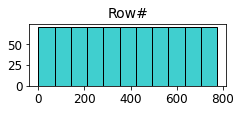

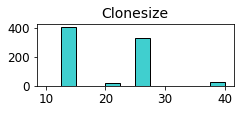

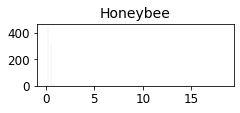

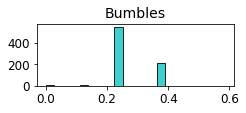

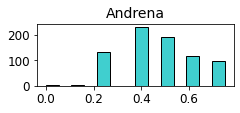

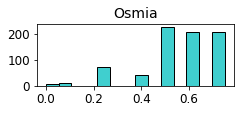

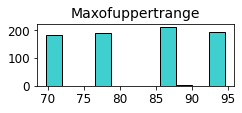

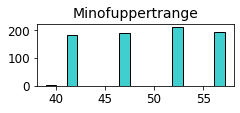

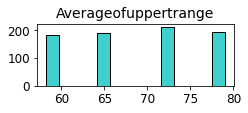

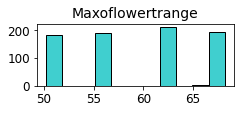

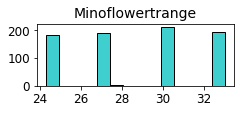

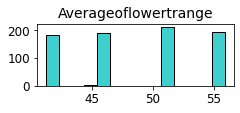

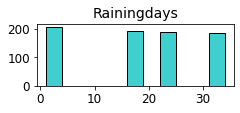

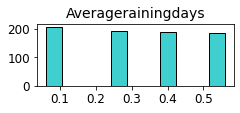

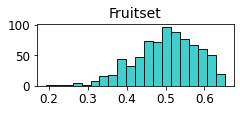

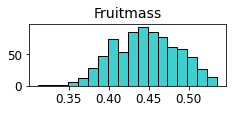

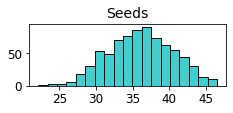

In [13]:
# let us visualize using histograms
plt.figure(figsize=(12,24))
counter = 1 
for col in pollination.columns[:-1]: 
    plt.figure(figsize=(12,8))
    ax1 = plt.subplot(6,3,counter)
    sns.histplot(pollination[col],color='c')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(col.title(), fontsize=14)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()
    counter += 1 

In [14]:
## Let us find any outliers are presnet.

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<Figure size 864x1728 with 0 Axes>

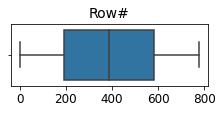

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


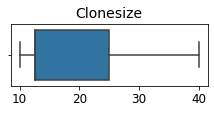

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


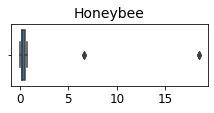

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


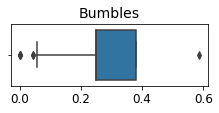

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


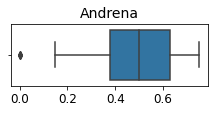

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


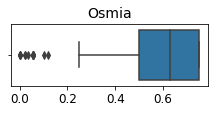

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


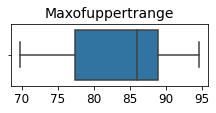

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


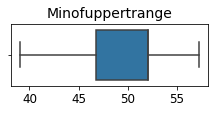

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


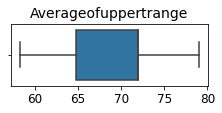

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


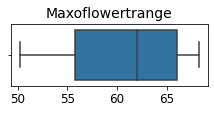

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


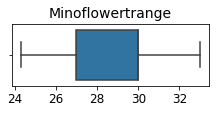

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


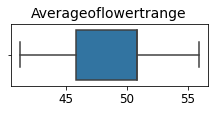

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


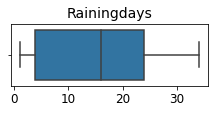

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


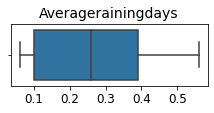

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


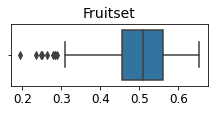

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


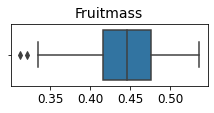

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


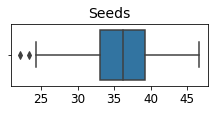

In [15]:
# let us visualize using histograms
plt.figure(figsize=(12,24))
counter = 1 
for col in pollination.columns[:-1]: 
    plt.figure(figsize=(12,8))
    ax1 = plt.subplot(6,3,counter)
    sns.boxplot(pollination[col])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(col.title(), fontsize=14)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()
    counter += 1 

#### observations:

1. From above visualizations, we can observe for few plots values are present outside of box plot.
2. Outlier valued columns are seeds,Fruitmass,Fruitset,Honeybee,osmia,Andrena, Bumbles 
  * Seeds: Outliers are below 25
  * Fruitmass : Outliers are below 0.35 
  * Fruitset: Outliers are below 0.3
  * Honeybee: Outliers are between 5 to 10
  * osmia: Outliers are below 0.1
  * Bumbles: Outliers are less than minimum value fo box and greater than maximum value of box
  * Andrena: Outliers are as at 0

In [16]:
# To treat them with outliers lets try out Interquartile operations.
# IQR : Q3-Q1 ==> (75% quartile - 25% quartile)

In [17]:
## InterQuartile Ranges of each column
Q1 = pollination.quantile(0.25)
Q3 = pollination.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Row#                     388.000000
clonesize                 12.500000
honeybee                   0.250000
bumbles                    0.130000
andrena                    0.250000
osmia                      0.250000
MaxOfUpperTRange          11.600000
MinOfUpperTRange           5.200000
AverageOfUpperTRange       7.200000
MaxOfLowerTRange          10.200000
MinOfLowerTRange           3.000000
AverageOfLowerTRange       5.000000
RainingDays               20.230000
AverageRainingDays         0.290000
fruitset                   0.106571
fruitmass                  0.059869
seeds                      6.123577
yield                   1897.334830
dtype: float64


In [18]:
processedPollination = pollination[~((pollination < (Q1 - 1.5 * IQR)) |(pollination > (Q3 + 1.5 * IQR))).any(axis=1)]
processedPollination.describe()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000
mean,382.337766,18.583777,0.356383,0.286649,0.475000,0.576463,82.076729,49.617154,68.577527,59.159840,28.628059,48.514362,18.484043,0.323564,0.506071,0.448129,36.359835,6079.902114
std,217.501250,6.885425,0.129602,0.058530,0.156807,0.149782,9.254791,5.610176,7.731659,6.687814,3.232915,5.454360,12.064176,0.168673,0.074723,0.038301,4.149800,1297.671790
min,0.000000,12.500000,0.250000,0.250000,0.250000,0.250000,69.700000,42.100000,58.200000,50.200000,24.300000,41.200000,1.000000,0.100000,0.308856,0.358821,27.190651,2825.003738
25%,194.750000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,1.000000,0.100000,0.458961,0.418833,33.312121,5203.052234
50%,382.500000,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.509858,0.447567,36.310639,6153.369070
75%,570.250000,25.000000,0.500000,0.380000,0.630000,0.750000,88.150000,53.300000,73.675000,63.550000,30.750000,52.075000,24.000000,0.390000,0.564822,0.476859,39.368775,7052.695481
max,758.000000,37.500000,0.750000,0.380000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.369344,8969.401842


Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<Figure size 864x1728 with 0 Axes>

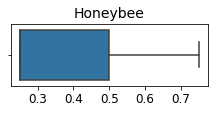

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


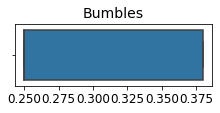

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


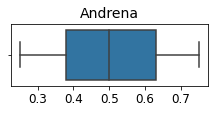

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


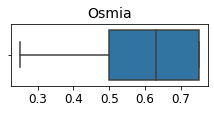

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


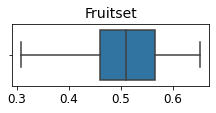

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


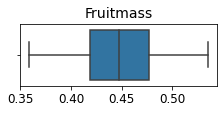

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


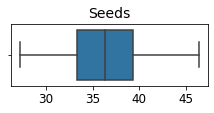

In [19]:
## For verification, lets plot box plot again. 
# let us visualize using histograms
plt.figure(figsize=(12,24))
counter = 1 
for col in ['honeybee','bumbles','andrena','osmia','fruitset','fruitmass','seeds']: 
    plt.figure(figsize=(12,8))
    ax1 = plt.subplot(6,3,counter)
    sns.boxplot(processedPollination[col])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(col.title(), fontsize=14)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()
    counter += 1 

#### Observations:

* As, we can observe, outliers are removed from plots

In [20]:
# We can Drop Row columns, as we wont need (as it has only values same as index)
processedPollination.drop("Row#",axis=1,inplace=True)
processedPollination.head()


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [21]:
# Let us try to get Correlation
processedPollination.corr()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
clonesize,1.000000,0.849859,0.036613,0.026053,-0.100149,0.008441,0.008498,0.008575,0.008494,0.008472,0.008484,-0.036500,-0.038758,-0.543512,-0.459179,-0.484549,-0.497965
honeybee,0.849859,1.000000,0.112885,0.197218,0.128819,0.004620,0.004629,0.004648,0.004628,0.004625,0.004617,-0.004874,-0.005336,-0.418614,-0.364690,-0.383849,-0.361844
bumbles,0.036613,0.112885,1.000000,-0.068276,0.160133,0.010844,0.010840,0.010850,0.010841,0.010842,0.010820,0.003771,0.004286,0.240464,0.269165,0.291045,0.255970
andrena,0.026053,0.197218,-0.068276,1.000000,0.353502,-0.000509,-0.000537,-0.000577,-0.000535,-0.000524,-0.000526,0.020708,0.022242,0.063321,0.032298,0.029017,0.101106
osmia,-0.100149,0.128819,0.160133,0.353502,1.000000,-0.015780,-0.015834,-0.015933,-0.015830,-0.015810,-0.015785,0.036872,0.039080,0.280458,0.254137,0.272781,0.327029
MaxOfUpperTRange,0.008441,0.004620,0.010844,-0.000509,-0.015780,1.000000,0.999998,0.999988,0.999998,0.999999,0.999988,-0.004529,-0.004532,-0.095093,0.107051,0.007113,-0.156796
MinOfUpperTRange,0.008498,0.004629,0.010840,-0.000537,-0.015834,0.999998,1.000000,0.999994,1.000000,0.999999,0.999992,-0.004514,-0.004515,-0.094342,0.108109,0.007997,-0.156173
AverageOfUpperTRange,0.008575,0.004648,0.010850,-0.000577,-0.015933,0.999988,0.999994,1.000000,0.999994,0.999992,0.999979,-0.004476,-0.004475,-0.093565,0.109162,0.008903,-0.155534
MaxOfLowerTRange,0.008494,0.004628,0.010841,-0.000535,-0.015830,0.999998,1.000000,0.999994,1.000000,1.000000,0.999992,-0.004515,-0.004517,-0.094397,0.108032,0.007933,-0.156219
MinOfLowerTRange,0.008472,0.004625,0.010842,-0.000524,-0.015810,0.999999,0.999999,0.999992,1.000000,1.000000,0.999991,-0.004521,-0.004523,-0.094682,0.107631,0.007598,-0.156455


<AxesSubplot:>

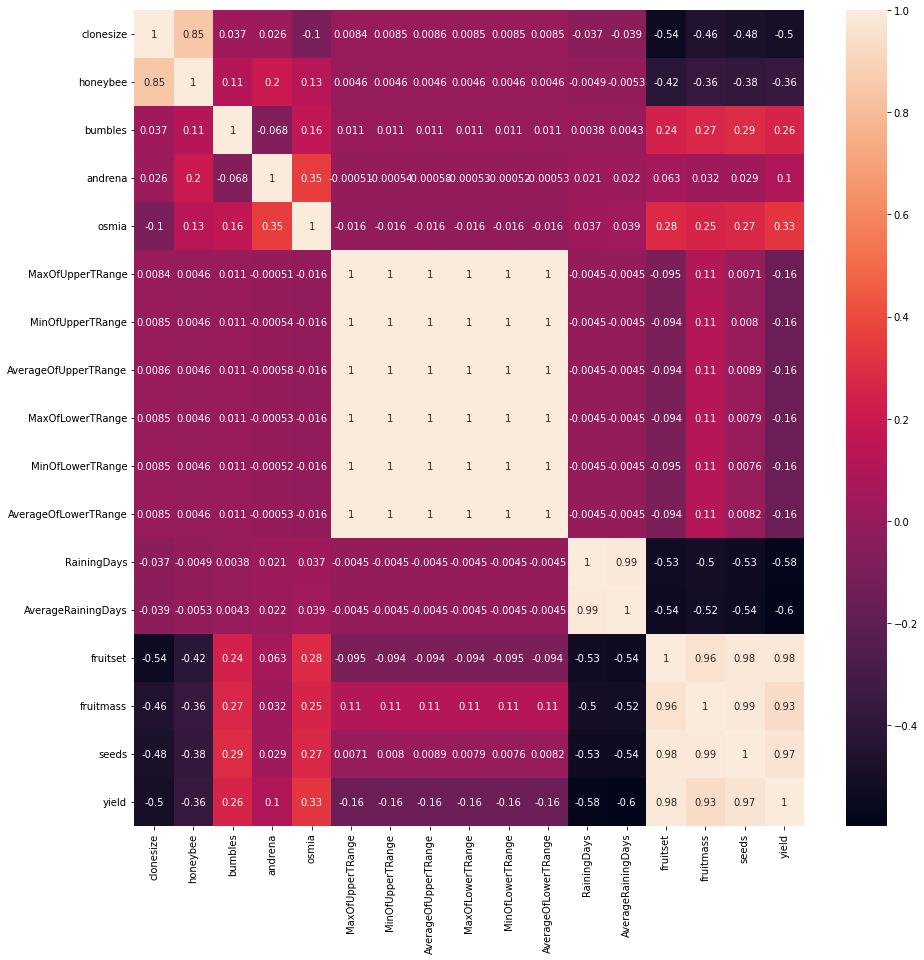

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(processedPollination.corr(),annot=True)

#### Observations:

* As we can observe, in the last row where we can find the values wrt yield. 
 1. clonesize, is inversly proportional to yielding. (negatively  correlated, if clonesize values goes up yielding goes down and vice-  versa).
 2. same followed by honeybees, (negatively correlated)
 3. Bubmles are positively correlated near to negligible value.
 4. Andrena is positively correlated but dont have much relationship between two as per value.
 5. Osmia is quite good correlation and has a good relationship with yielding.
 6.The Temperatures values aren't in a good relationship with yielding, and they are negatively correlated.
 7. Raining Days and Average raining days are correlated with better relationship.
 8. Fruitset, mass, seeds are highly correlated with yielding.

In [23]:
# let us keep average temperatures and drop maximum and minimum temperatures as they dont have good relationship.
# or vice-versa (keep maximum and mainimum, drop averaging temperatures)

In [24]:
processedPollination.drop(["MaxOfUpperTRange","MinOfUpperTRange",
                          "MaxOfLowerTRange","MinOfLowerTRange"],axis=1,inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [25]:
processedPollination.shape

(752, 13)

### 3. Preprocessing

In [26]:
processedPollination.columns

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'AverageOfUpperTRange', 'AverageOfLowerTRange', 'RainingDays',
       'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds', 'yield'],
      dtype='object')

* Note: 
    
    * We are dropping fruitset, fruitmass, seeds as they are the features that comes after 'yield' (after the production of plant, we get fruits, its mass)

In [27]:
# Let us train them again.

X1 = processedPollination.drop('yield',axis=1)
y1 = processedPollination['yield']

X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.23,random_state=21)
print("Shape of predictor training data: ",X1_train.shape)
print("Shape of predictor testing data: ",X1_test.shape)
print("Shape of Target training data: ",y1_train.shape)
print("Shape of Target testing data: ",y1_test.shape)


Shape of predictor training data:  (579, 12)
Shape of predictor testing data:  (173, 12)
Shape of Target training data:  (579,)
Shape of Target testing data:  (173,)


### LinearRegression

In [28]:
lr1 = LinearRegression()
lr1.fit(X1_train,y1_train)
lr1_pred = lr1.predict(X1_test)

In [29]:
scores(y1_test,lr1_pred)

MAE: 86.495
MSE: 11806.818
RMSE: 108.659
R-Square: 0.994


In [30]:
joblib.dump(lr1,'linearReg.joblib')

['linearReg.joblib']

#### XGB model

In [31]:
xg1 = XGBRegressor()
xg1.fit(X1_train,y1_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [32]:
xg1Pred = xg1.predict(X1_test)
print(scores(y1_test,xg1Pred))

MAE: 115.556
MSE: 21082.256
RMSE: 145.197
R-Square: 0.989
None


In [33]:
joblib.dump(xg1,'xgb1.joblib')

['xgb1.joblib']

#### Additional Preprocessing

In [34]:
# we can have a look at rmse, it didn't change from last prediction of two same models.
# Let us try to remove 'Average temperatures' , honeybee and try.

In [35]:
X1.drop(['AverageOfUpperTRange','AverageOfLowerTRange','honeybee'],inplace=True,axis=1)

In [36]:
X2 = X1
X2.shape

(752, 9)

In [37]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y1,test_size=0.15,random_state=42)

In [38]:
# Training again
lr2 = LinearRegression()
lr2.fit(X2_train,y2_train)
lr2_pred = lr2.predict(X2_test)

In [39]:
scores(y2_test,lr2_pred)

MAE: 92.066
MSE: 14143.643
RMSE: 118.927
R-Square: 0.991


In [40]:
joblib.dump(lr2_pred,'linearReg2.joblib')

['linearReg2.joblib']

In [41]:
# xgboost 
xg2 = XGBRegressor()
xg2.fit(X2_train,y2_train)
xg2Pred = xg2.predict(X2_test)


In [42]:
scores(xg2Pred,y2_test)

MAE: 108.155
MSE: 19981.245
RMSE: 141.355
R-Square: 0.988


In [43]:
joblib.dump(xg2,'xgb2.joblib')

['xgb2.joblib']

In [44]:
## It is giving same RMSE.
xg2.feature_importances_

array([0.00646719, 0.00222612, 0.00190365, 0.00846664, 0.02506239,
       0.        , 0.7965015 , 0.0064107 , 0.15296184], dtype=float32)

In [45]:
from sklearn.ensemble import RandomForestRegressor

# Defining the model and stating the random state to 1
rf_model = RandomForestRegressor(random_state=1)

# fitting the model
rf_model.fit(X2_train, y2_train)
pred_rf=rf_model.predict(X2_test)
# pred_rf=pred_rf.reshape(151,1)


In [46]:
scores(pred_rf,y2_test)

MAE: 103.418
MSE: 17394.969
RMSE: 131.890
R-Square: 0.989


In [47]:
joblib.dump(rf_model,'rf.joblib')

['rf.joblib']

In [48]:
## The RMSE of first linear regression is less of 108.

In [49]:
print("lr1_model")
print("\n")
lr1_model = scores(y1_test,lr1_pred)
print("\n\n")
print("XG1_model")
xg1_model = scores(y1_test,xg1Pred)
print("\n\n")
print("lr2_model")
lr2_model = scores(y2_test,lr2_pred)
print("\n\n")
print("xg2_model")
xg2_model = scores(xg2Pred,y2_test)
print("\n\n")
print("rf_model")
rf_model = scores(pred_rf,y2_test)

lr1_model


MAE: 86.495
MSE: 11806.818
RMSE: 108.659
R-Square: 0.994



XG1_model
MAE: 115.556
MSE: 21082.256
RMSE: 145.197
R-Square: 0.989



lr2_model
MAE: 92.066
MSE: 14143.643
RMSE: 118.927
R-Square: 0.991



xg2_model
MAE: 108.155
MSE: 19981.245
RMSE: 141.355
R-Square: 0.988



rf_model
MAE: 103.418
MSE: 17394.969
RMSE: 131.890
R-Square: 0.989


* As per above scores, models has good score of R-square, lets consider rf RandoM Forest for deployment

In [50]:
%cd /kaggle/working/
!tar -czvf my_work.zip -C . .

/kaggle/working
./
./xgb.pkl
./xgb2.joblib
./.virtual_documents/
./rf.joblib
./linearReg.joblib
./linearReg2.joblib
./__notebook_source__.ipynb
./xgb1.joblib
tar: .: file changed as we read it


In [51]:
print("Done!")

Done!
